In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

워케이션의 정의: 개인이 대중교통을 활용해 '훌쩍' 떠날 수 있어야
-> 비행기, 자차 제외

In [3]:
#버스 데이터
bus_run=pd.read_csv("./전국_대중교통_ 버스평균운행시간.csv",encoding='cp949')
bus_stop=pd.read_csv("./전국_대중교통_버스터미널현황.csv",encoding='cp949')

#기차 데이터
train_run=pd.read_csv("./선구간별_주중여객열차운행횟수.csv",encoding='cp949')
train_get=pd.read_csv("./역별_승하차현황.csv",encoding='cp949')

In [4]:
bus_run['계']=bus_stop['계']
run_mean=(bus_run['평일']+bus_run['토요일']+bus_run['일요일'])/3
bus_run['평균운행시간']=run_mean
bus_run.drop(['평일','토요일','일요일'],axis=1,inplace=True)
bus_run

,구분,계,평균운행시간
0,서울,5,100.200000
1,부산,2,147.666667
2,대구,4,140.766667
3,인천,3,115.133333
4,광주,10,133.333333
5,대전,3,125.300000
6,울산,2,86.700000
7,세종,3,46.266667
8,경기,28,121.133333
9,강원,38,79.700000


In [5]:
bus_matrix=bus_run.corr(numeric_only=True)
bus_matrix['계'].sort_values(ascending=False)
#버스 운행량과 운영 시간은 상관관계 없음

계         1.000000
평균운행시간   -0.509798
Name: 계, dtype: float64

In [6]:
bus_run['버스 점수']=bus_run['계']*bus_run['평균운행시간']

In [7]:
train_netget=train_get['하차인원']-train_get['승차인원']
train_get['잔여추정인원']=train_netget

In [8]:
train_get.sort_values(by=['하차인원'],ascending=False,inplace=True)
train_get.drop(["역명"],axis=1,inplace=True)
train_get.drop_duplicates(subset=['권역'],inplace=True) #권역별 잔여추정

In [9]:
train_run.info()
train_run.drop(['선명','통근(회/일)','전동차(회/일)'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선명        24 non-null     object 
 1   KTX(회/일)  5 non-null      float64
 2   ITX(회/일)  1 non-null      float64
 3   새마을(회/일)  6 non-null      float64
 4   무궁화(회/일)  13 non-null     float64
 5   누리로(회/일)  3 non-null      float64
 6   통근(회/일)   1 non-null      float64
 7   전동차(회/일)  13 non-null     float64
 8   경기        6 non-null      float64
 9   충북        5 non-null      float64
 10  충남        4 non-null      float64
 11  대전        4 non-null      float64
 12  경북        2 non-null      float64
 13  대구        2 non-null      float64
 14  경남        2 non-null      float64
 15  울산        2 non-null      float64
 16  부산        2 non-null      float64
 17  전북        2 non-null      float64
 18  광주        1 non-null      float64
 19  전남        2 non-null      float64
 20  강원        2 non-null      float64


In [10]:
train_run.fillna(0,inplace=True)

In [11]:
train_run_avg=(train_run['ITX(회/일)']+train_run['KTX(회/일)']
                     +train_run['누리로(회/일)']+train_run['무궁화(회/일)']
                     +train_run['새마을(회/일)'])/5 #노선별 평균 운행 횟수
train_run['평균운행횟수']=train_run_avg
train_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KTX(회/일)  24 non-null     float64
 1   ITX(회/일)  24 non-null     float64
 2   새마을(회/일)  24 non-null     float64
 3   무궁화(회/일)  24 non-null     float64
 4   누리로(회/일)  24 non-null     float64
 5   경기        24 non-null     float64
 6   충북        24 non-null     float64
 7   충남        24 non-null     float64
 8   대전        24 non-null     float64
 9   경북        24 non-null     float64
 10  대구        24 non-null     float64
 11  경남        24 non-null     float64
 12  울산        24 non-null     float64
 13  부산        24 non-null     float64
 14  전북        24 non-null     float64
 15  광주        24 non-null     float64
 16  전남        24 non-null     float64
 17  강원        24 non-null     float64
 18  평균운행횟수    24 non-null     float64
dtypes: float64(19)
memory usage: 3.7 KB


In [12]:
#평균 운행 횟수: 24X1 행렬, (각) 지역: 24X13 행렬
#행렬곱으로 권역별 운영 (평군) 운영 횟수 산출
train_run_areas=train_run.iloc[:,5:18]
train_run_score=train_run_avg.T.dot(train_run_areas)
train_run_score=pd.DataFrame(train_run_score)

In [13]:
bus_run_score=bus_run.loc[:,['구분','버스 점수']]
bus_run_score
bus_run_score.drop([0,7,16],inplace=True) #분석 대상 아닌 서울, 제주, 세종 제외
bus_run_score.loc[8,'버스 점수']=3391.733333+345.400000
bus_run_score.drop([3],inplace=True) #인천: 경기에 더한 다음 목록에서 제외

In [14]:
bus_run_score.set_index('구분',inplace=True)

In [15]:
print(bus_run_score.info())
print(train_run_score.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 부산 to 경남
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   버스 점수   13 non-null     float64
dtypes: float64(1)
memory usage: 208.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 경기 to 강원
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
dtypes: float64(1)
memory usage: 208.0+ bytes
None


In [16]:
score_df=pd.concat([train_run_score,bus_run_score],axis='columns')
score_df

,0,버스 점수
경기,93.0,3737.133333
충북,85.8,1228.033333
충남,81.4,884.800000
대전,81.4,375.900000
경북,40.2,2716.533333
대구,45.8,563.066667
경남,45.8,2555.000000
울산,43.8,173.400000
부산,43.8,295.333333
전북,35.6,1973.400000


(100.0, 4000.0)

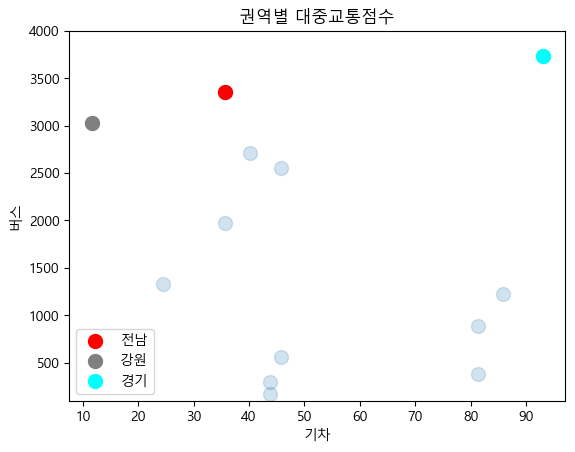

In [17]:
plt.scatter(score_df[0],score_df['버스 점수'],alpha=0.2,s=100)
plt.scatter(35.6,3357.466667,c='red',label='전남',s=100)
plt.scatter(11.6,3028.6,c='grey',label='강원',s=100)
plt.scatter(93.0,3737.133333,c='cyan',label='경기',s=100) 
plt.legend(loc=3)

plt.title('권역별 대중교통점수')
plt.xlabel('기차')
plt.ylabel('버스')

#ymin,ymax=plt.ylim() #-4.786666650000001 3915.31999965
plt.ylim(100,4000)